### Loan Data and View Distribution of Approval Status 

/var/folders/f5/1cffz1zs429dv39ndcjvvt4m0000gn/T/ipykernel_29129/2262110426.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_data, x='LoanApproved', palette='coolwarm')


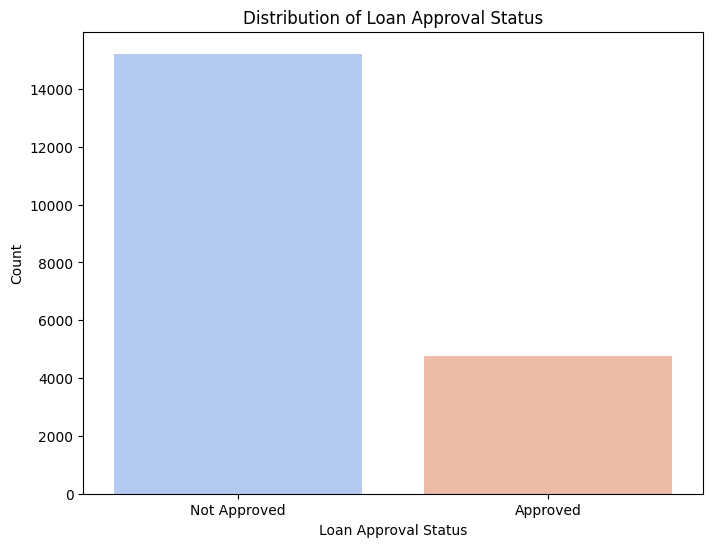

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'Loan.csv'
loan_data = pd.read_csv(file_path)
loan_data.head()

plt.figure(figsize=(8, 6))
sns.countplot(data=loan_data, x='LoanApproved', palette='coolwarm')
plt.title("Distribution of Loan Approval Status")
plt.xlabel("Loan Approval Status")
plt.ylabel("Count")
plt.xticks([0, 1], ['Not Approved', 'Approved'])
plt.show()

### Create Correlation Matrix to Gather Features for Model Training

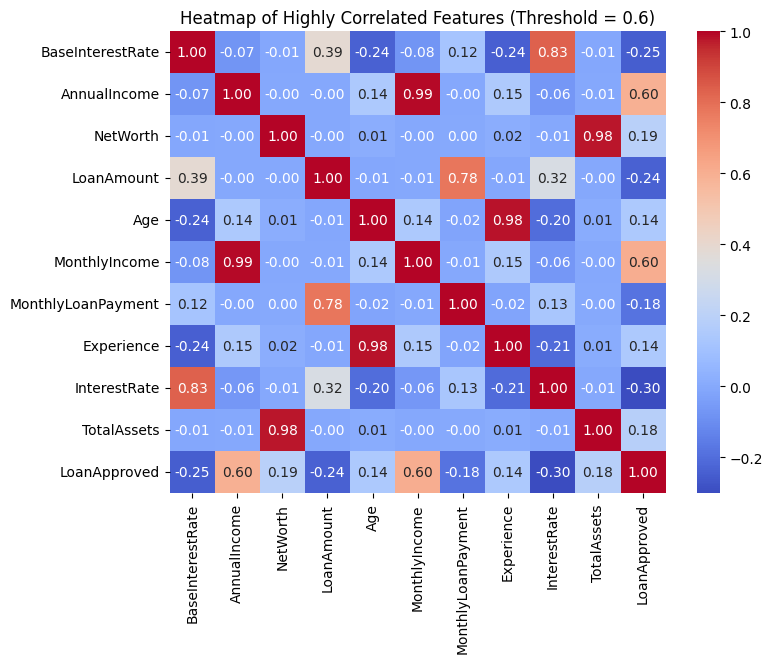

In [2]:
# Select numerical features for correlation
numerical_features = loan_data.select_dtypes(include=['float64', 'int64'])
threshold = 0.6
correlation_matrix = numerical_features.corr()

# Convert the set of high correlation features to a list
high_corr_pairs = (correlation_matrix
                   .unstack()
                   .reset_index()
                   .rename(columns={0: 'correlation', 'level_0': 'feature_1', 'level_1': 'feature_2'}))

# Filter out self-correlations and retain only high correlations
high_corr_pairs = high_corr_pairs[(high_corr_pairs['correlation'] >= threshold) & 
                                  (high_corr_pairs['feature_1'] != high_corr_pairs['feature_2'])]

# Get the unique set of highly correlated features
high_corr_features = set(high_corr_pairs['feature_1']).union(set(high_corr_pairs['feature_2']))
high_corr_features_list = list(high_corr_features)

# Filter the correlation matrix to include only these features
filtered_correlation_matrix = correlation_matrix.loc[high_corr_features_list, high_corr_features_list]

# Plot the smaller heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Highly Correlated Features (Threshold = 0.6)")
plt.show()


### Feature Correlation with Loan Approval Graph

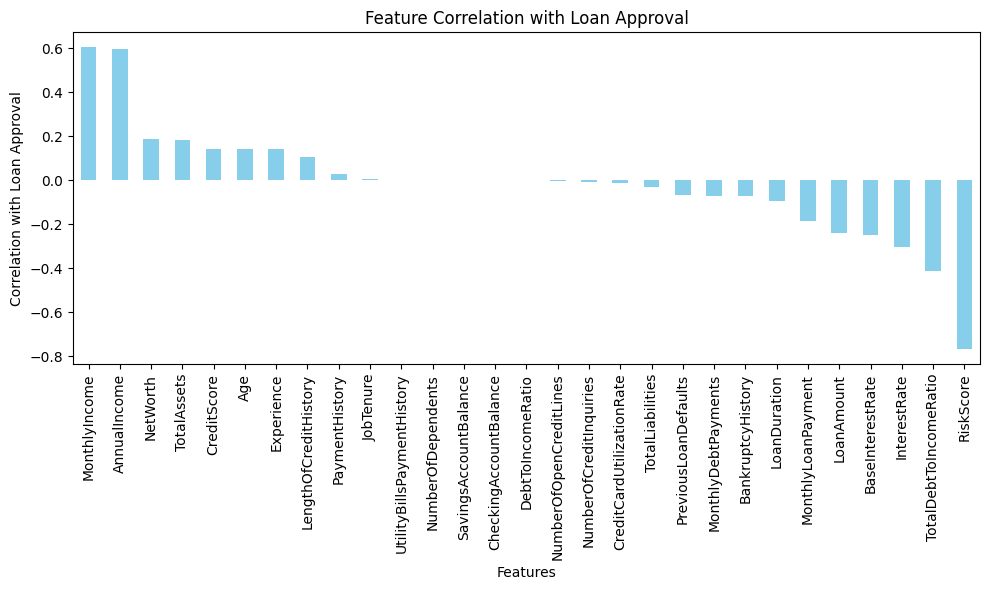

In [3]:
# Calculate the correlation of each feature with the LoanApproved target variable
loan_approval_correlation = correlation_matrix['LoanApproved'].drop('LoanApproved').sort_values(ascending=False)

# Plot the correlations with LoanApproved
plt.figure(figsize=(10, 6))
loan_approval_correlation.plot(kind='bar', color='skyblue')
plt.title("Feature Correlation with Loan Approval")
plt.xlabel("Features")
plt.ylabel("Correlation with Loan Approval")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### TODO: Experiemnt with Predictor Variables
- We can make new variables by combining some features into an entirely new parameter
- We can run gridsearch or something similar to get the best features 
- Modify `predictor_variables` to do this :-)

In [4]:
from sklearn.model_selection import train_test_split
# Select the most correlated features as predictors and the target variable
target_variable = 'LoanApproved'
predictor_variables = ['MonthlyIncome', 'AnnualIncome', 'NetWorth', 'TotalAssets', 'CreditScore', 'Age', 'Experience', 'LengthOfCreditHistory', 'PaymentHistory', 'TotalDebtToIncomeRatio', 'RiskScore', 'InterestRate', 'BaseInterestRate', 'LoanAmount', 'LoanDuration']
#predictor_variables = high_corr_features_list #MonthlyIncome, AnnualIncome, NetWorth, TotalAssets, CreditScore, Age, Experience, LengthOfCreditHistory, PaymentHistory, TotalDebtIncomeRatio, RiskScore, IntrestRate, BaseIntrestRate, LoanAmount, LoanDuration

# Ensure the target variable is in the dataset and split the data
X = loan_data[predictor_variables]
y = loan_data[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Run Different Models and Evaluate Preformance 
1. Random Forrest 
2. Logistic Regression
3. Support Vector Machine 
3. K-Nearest Neighbors
4. Gradient Boosting XGboost

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
report = classification_report(y_test, y_pred, target_names=['Not Approved', 'Approved'])
print(report)


              precision    recall  f1-score   support

Not Approved       0.99      0.99      0.99      2983
    Approved       0.99      0.98      0.98      1017

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Select the most correlated features as predictors and the target variable
target_variable = 'LoanApproved'
#predictor_variables = high_corr_features_list

# Ensure the target variable is in the dataset and split the data
X = loan_data[predictor_variables]
y = loan_data[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
report = classification_report(y_test, y_pred, target_names=['Not Approved', 'Approved'])
print(report)

              precision    recall  f1-score   support

Not Approved       0.93      0.96      0.95      2983
    Approved       0.88      0.80      0.84      1017

    accuracy                           0.92      4000
   macro avg       0.91      0.88      0.89      4000
weighted avg       0.92      0.92      0.92      4000



/Users/emilygelchie/miniconda3/envs/cornellenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
from sklearn.svm import SVC

# Train a Support Vector Machine
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model's performance
svm_report = classification_report(y_test, y_pred_svm, target_names=['Not Approved', 'Approved'])
print(svm_report)

              precision    recall  f1-score   support

Not Approved       0.89      0.96      0.92      2983
    Approved       0.83      0.64      0.72      1017

    accuracy                           0.88      4000
   macro avg       0.86      0.80      0.82      4000
weighted avg       0.87      0.88      0.87      4000



              precision    recall  f1-score   support

Not Approved       0.89      0.93      0.91      2983
    Approved       0.75      0.66      0.71      1017

    accuracy                           0.86      4000
   macro avg       0.82      0.79      0.81      4000
weighted avg       0.86      0.86      0.86      4000



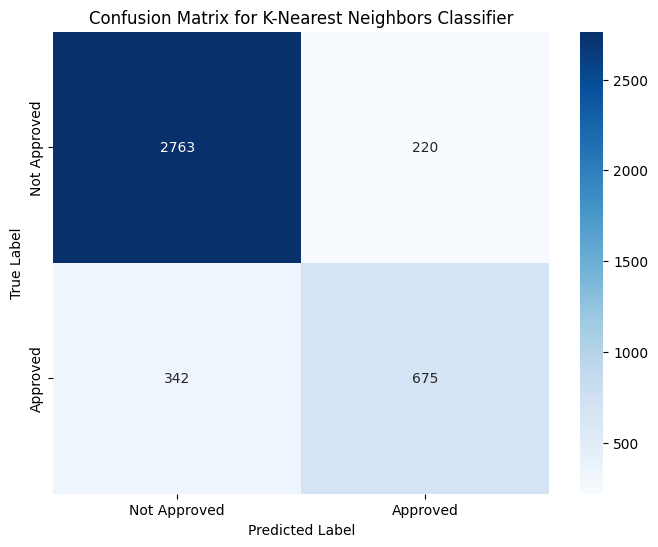

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Train a K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model's performance
knn_report = classification_report(y_test, y_pred_knn, target_names=['Not Approved', 'Approved'])
print(knn_report)

conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.title("Confusion Matrix for K-Nearest Neighbors Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [9]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Train a Gradient Boosting Classifier using XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model's performance
xgb_report = classification_report(y_test, y_pred_xgb, target_names=['Not Approved', 'Approved'])
print(xgb_report)

              precision    recall  f1-score   support

Not Approved       1.00      1.00      1.00      2983
    Approved       0.99      0.99      0.99      1017

    accuracy                           1.00      4000
   macro avg       0.99      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



<Figure size 1200x600 with 0 Axes>

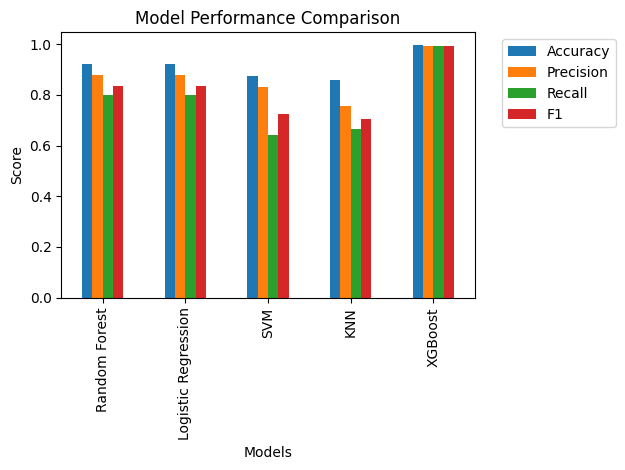

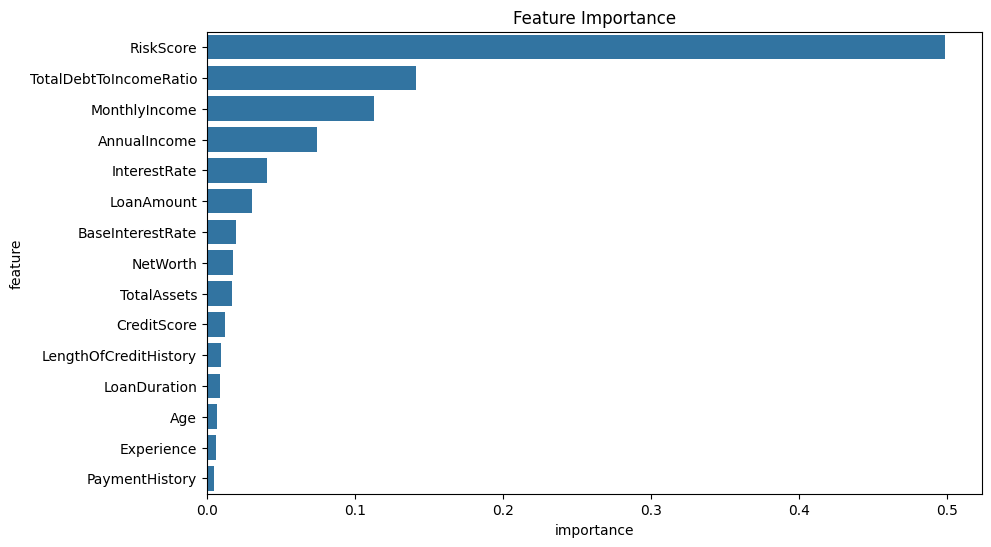

Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best score: 0.9732390670591666
Cross-validation scores: [0.97463284 0.96380697 0.97127589 0.97590361 0.98057602]
Mean CV score: 0.9732390670591666
Standard deviation: 0.005580176603373871


In [10]:
### Model Comparison and Visualization
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create dictionary to store model results
model_results = {
    "Random Forest": (model, y_pred),
    "Logistic Regression": (model, y_pred),
    "SVM": (svm_model, y_pred_svm),
    "KNN": (knn_model, y_pred_knn),
    "XGBoost": (xgb_model, y_pred_xgb),
}

# Calculate metrics for each model
metrics = {}
for name, (model, predictions) in model_results.items():
    metrics[name] = {
        "Accuracy": accuracy_score(y_test, predictions),
        "Precision": precision_score(y_test, predictions),
        "Recall": recall_score(y_test, predictions),
        "F1": f1_score(y_test, predictions),
    }

# Create comparison plot
metrics_df = pd.DataFrame(metrics).T
plt.figure(figsize=(12, 6))
metrics_df.plot(kind="bar")
plt.title("Model Performance Comparison")
plt.xlabel("Models")
plt.ylabel("Score")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

### Feature Engineering
# Create new features
loan_data["DebtToAssets"] = (
    loan_data["TotalDebtToIncomeRatio"] * loan_data["TotalAssets"]
)
loan_data["IncomeToAge"] = loan_data["AnnualIncome"] / loan_data["Age"]
loan_data["CreditScoreToHistory"] = (
    loan_data["CreditScore"] / loan_data["LengthOfCreditHistory"]
)

# Feature Selection using Random Forest importance
from sklearn.ensemble import RandomForestClassifier

rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selector.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.DataFrame(
    {"feature": predictor_variables, "importance": rf_selector.feature_importances_}
).sort_values("importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=feature_importance)
plt.title("Feature Importance")
plt.show()

### Hyperparameter Tuning Example (for Random Forest)
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, scoring="f1"
)

rf_grid.fit(X_train, y_train)
print("Best parameters:", rf_grid.best_params_)
print("Best score:", rf_grid.best_score_)

# Cross-validation scores
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    rf_grid.best_estimator_, X_train, y_train, cv=5, scoring="f1"
)

print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())


<Figure size 1000x800 with 0 Axes>

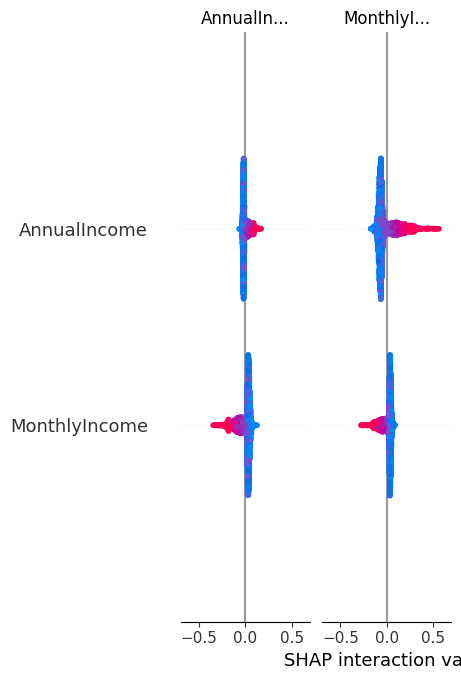

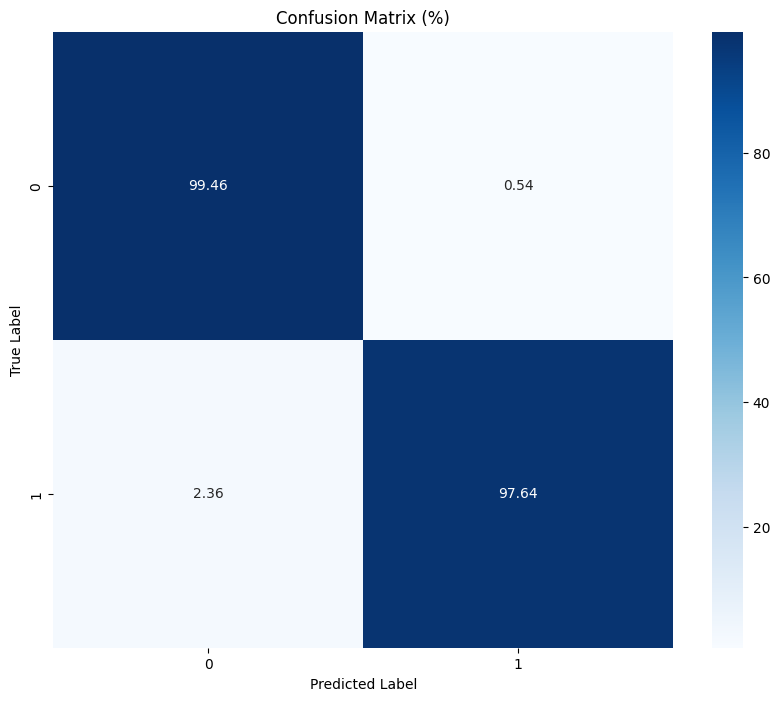

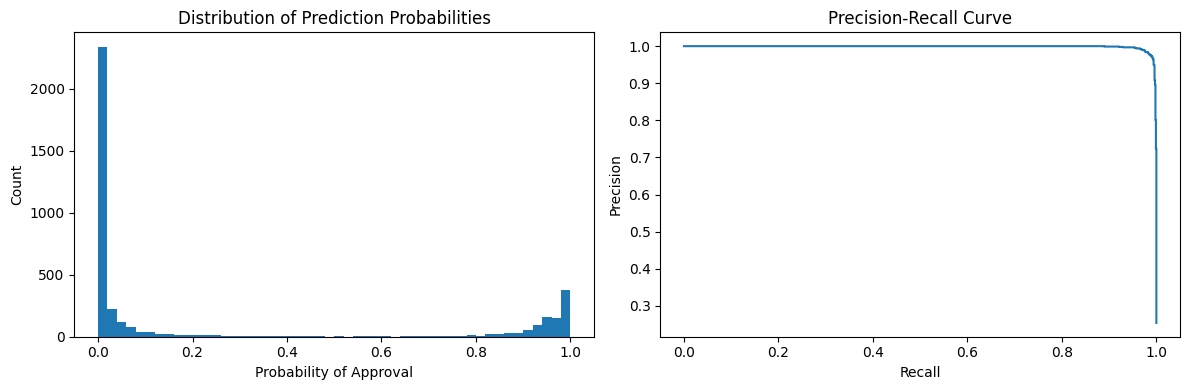

Optimal threshold: 0.44807142857142856

Top 10 Most Important Features:
                   feature  importance
10               RiskScore    0.536276
9   TotalDebtToIncomeRatio    0.128168
0            MonthlyIncome    0.111286
1             AnnualIncome    0.067702
11            InterestRate    0.039933
13              LoanAmount    0.027562
2                 NetWorth    0.016738
12        BaseInterestRate    0.016183
3              TotalAssets    0.014987
4              CreditScore    0.011574


In [17]:
from sklearn.metrics import precision_recall_curve  # Add this import

# First ensure feature names are properly formatted
feature_names = np.array(predictor_variables)  # Convert to numpy array

### 1. Feature Selection Refinement
best_rf = rf_grid.best_estimator_
important_features = pd.DataFrame(
    {"feature": predictor_variables, "importance": best_rf.feature_importances_}
).sort_values("importance", ascending=False)

# Select top N most important features
N = 10
top_features = important_features.head(N)["feature"].tolist()

### 2. Model Interpretability using SHAP
# Create SHAP explainer and values
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)

# Basic SHAP summary plot without feature names
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test)
plt.show()

### 3. Error Analysis with Confusion Matrix
y_pred_rf = best_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
cm_percent = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(10, 8))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="Blues")
plt.title("Confusion Matrix (%)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

### 4. Prediction Distribution Analysis
y_prob = best_rf.predict_proba(X_test)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(y_prob[:, 1], bins=50)
plt.title("Distribution of Prediction Probabilities")
plt.xlabel("Probability of Approval")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob[:, 1])
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.tight_layout()
plt.show()

# Calculate and print optimal threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
optimal_threshold = thresholds[np.argmax(f1_scores[:-1])]
print(f"Optimal threshold: {optimal_threshold}")

# Print top 10 most important features
print("\nTop 10 Most Important Features:")
print(important_features.head(10))



Performance Metrics with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2983
           1       0.97      0.98      0.98      1017

    accuracy                           0.99      4000
   macro avg       0.98      0.99      0.98      4000
weighted avg       0.99      0.99      0.99      4000



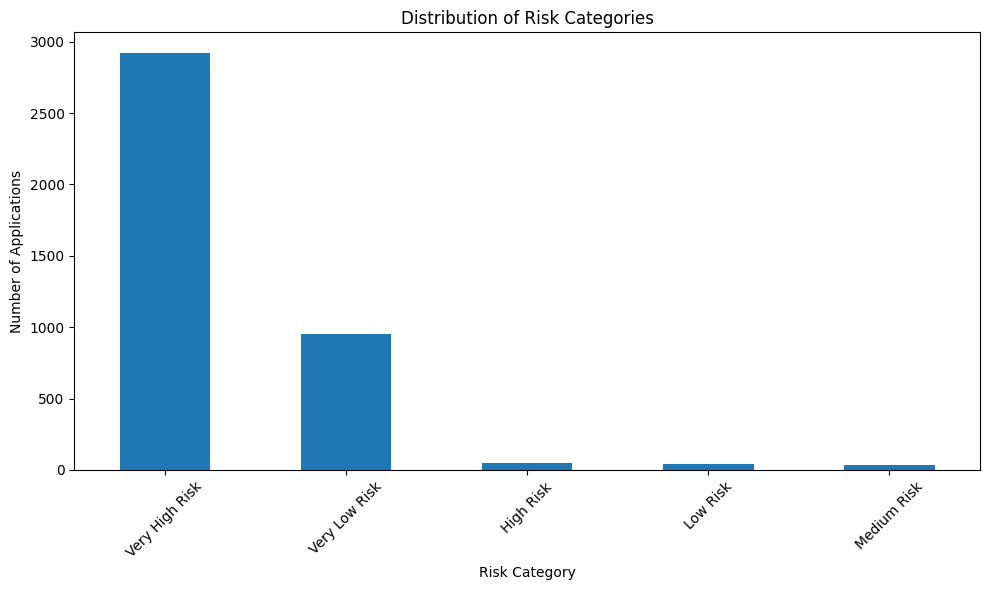

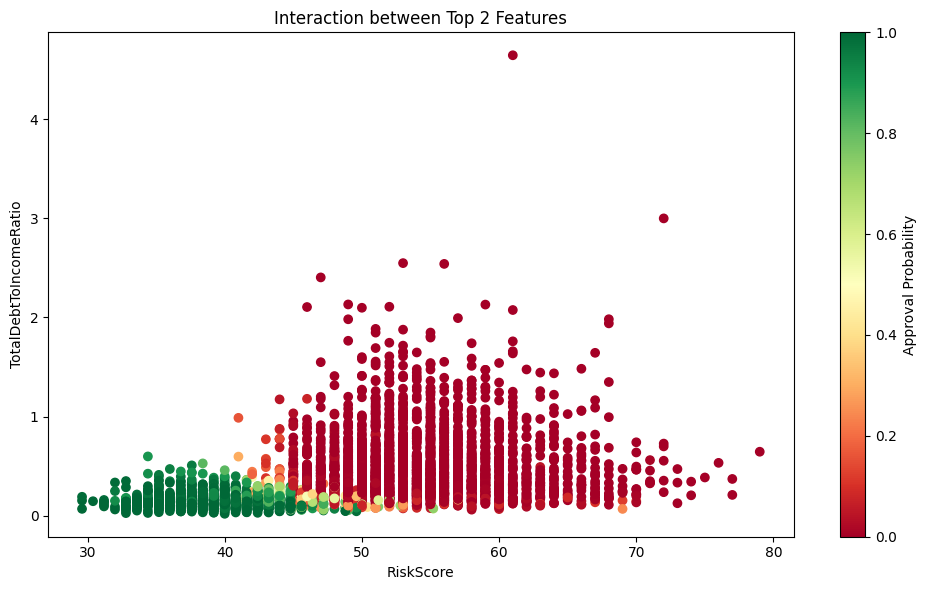

In [18]:
### 1. Create Focused Model with Top Features
top_5_features = important_features["feature"].head(5).tolist()

# Train model with only top features
X_top = X[top_5_features]
X_train_top, X_test_top, y_train, y_test = train_test_split(
    X_top, y, test_size=0.2, random_state=42
)

# Train RF with best parameters using only top features
focused_rf = RandomForestClassifier(**rf_grid.best_params_, random_state=42)
focused_rf.fit(X_train_top, y_train)

### 2. Apply Optimal Threshold
y_prob_focused = focused_rf.predict_proba(X_test_top)
y_pred_focused = (y_prob_focused[:, 1] > optimal_threshold).astype(int)

# Compare performance metrics
print("\nPerformance Metrics with Optimal Threshold:")
print(classification_report(y_test, y_pred_focused))


### 3. Create Risk Categories
def get_risk_category(prob):
    if prob < 0.2:
        return "Very High Risk"
    elif prob < 0.4:
        return "High Risk"
    elif prob < 0.6:
        return "Medium Risk"
    elif prob < 0.8:
        return "Low Risk"
    else:
        return "Very Low Risk"


# Apply risk categories to predictions
risk_probs = focused_rf.predict_proba(X_test_top)[:, 1]
risk_categories = [get_risk_category(prob) for prob in risk_probs]

# Show distribution of risk categories
risk_dist = pd.Series(risk_categories).value_counts()
plt.figure(figsize=(10, 6))
risk_dist.plot(kind="bar")
plt.title("Distribution of Risk Categories")
plt.xlabel("Risk Category")
plt.ylabel("Number of Applications")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4. Feature Interaction Analysis
if len(top_5_features) >= 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(
        X_test_top[top_5_features[0]],
        X_test_top[top_5_features[1]],
        c=risk_probs,
        cmap="RdYlGn",
    )
    plt.colorbar(label="Approval Probability")
    plt.xlabel(top_5_features[0])
    plt.ylabel(top_5_features[1])
    plt.title(f"Interaction between Top 2 Features")
    plt.tight_layout()
    plt.show()



Random Forest Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best F1 Score: 0.9732390670591666

Logistic Regression Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 Score: 0.9807103517680753

XGBoost Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 200}
Best F1 Score: 0.9863999274167907

KNN Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best F1 Score: 0.7285346974750948

Gradient Boosting Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best F1 Score: 0.9887958234427824

AdaBoost Best Parameters: {'learning_rate': 1.0, 'n_estimators': 100}
Best F1 Score: 0.9869623746436298

Extra Trees Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best F1 Score: 0.9753040993314543

Neural Network Best Parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,

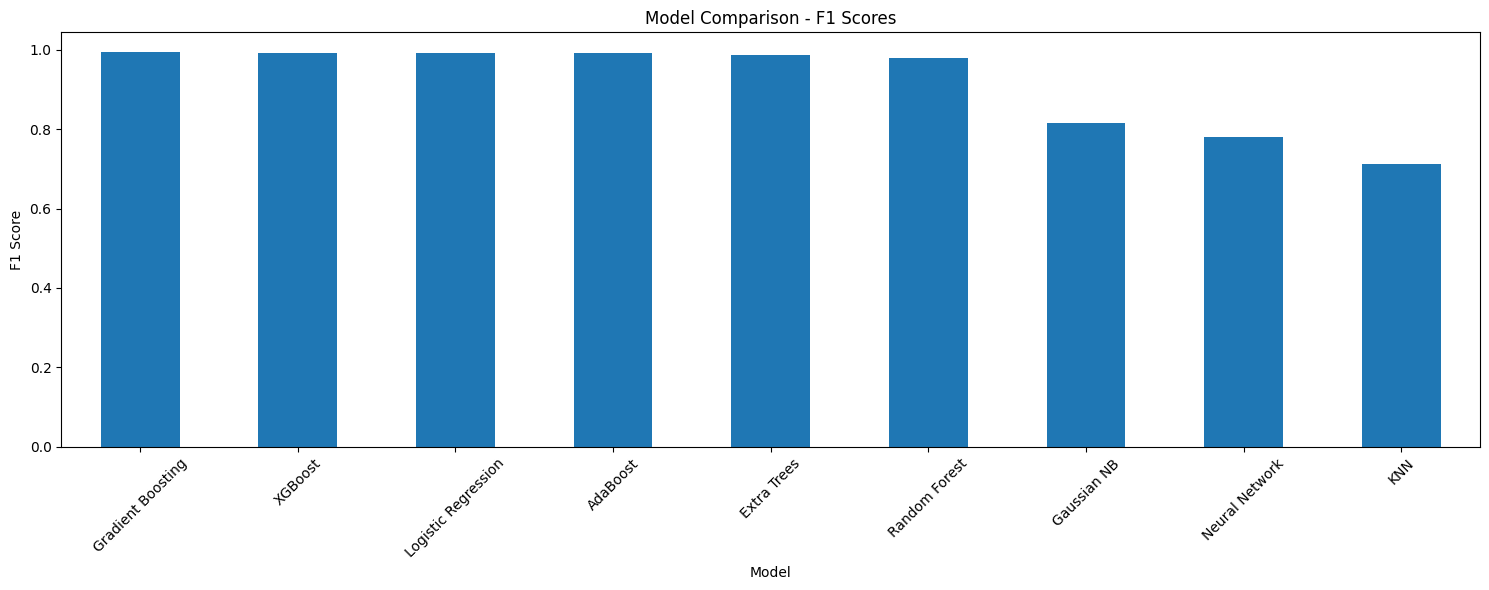

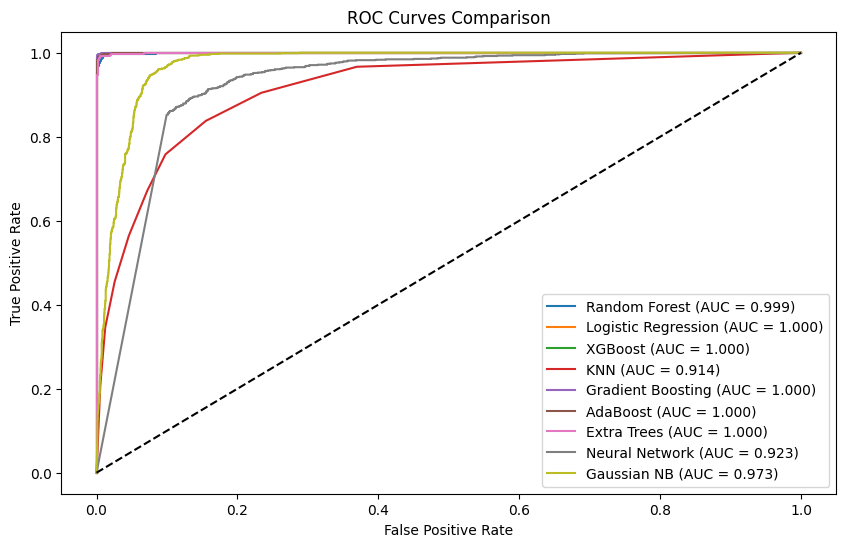

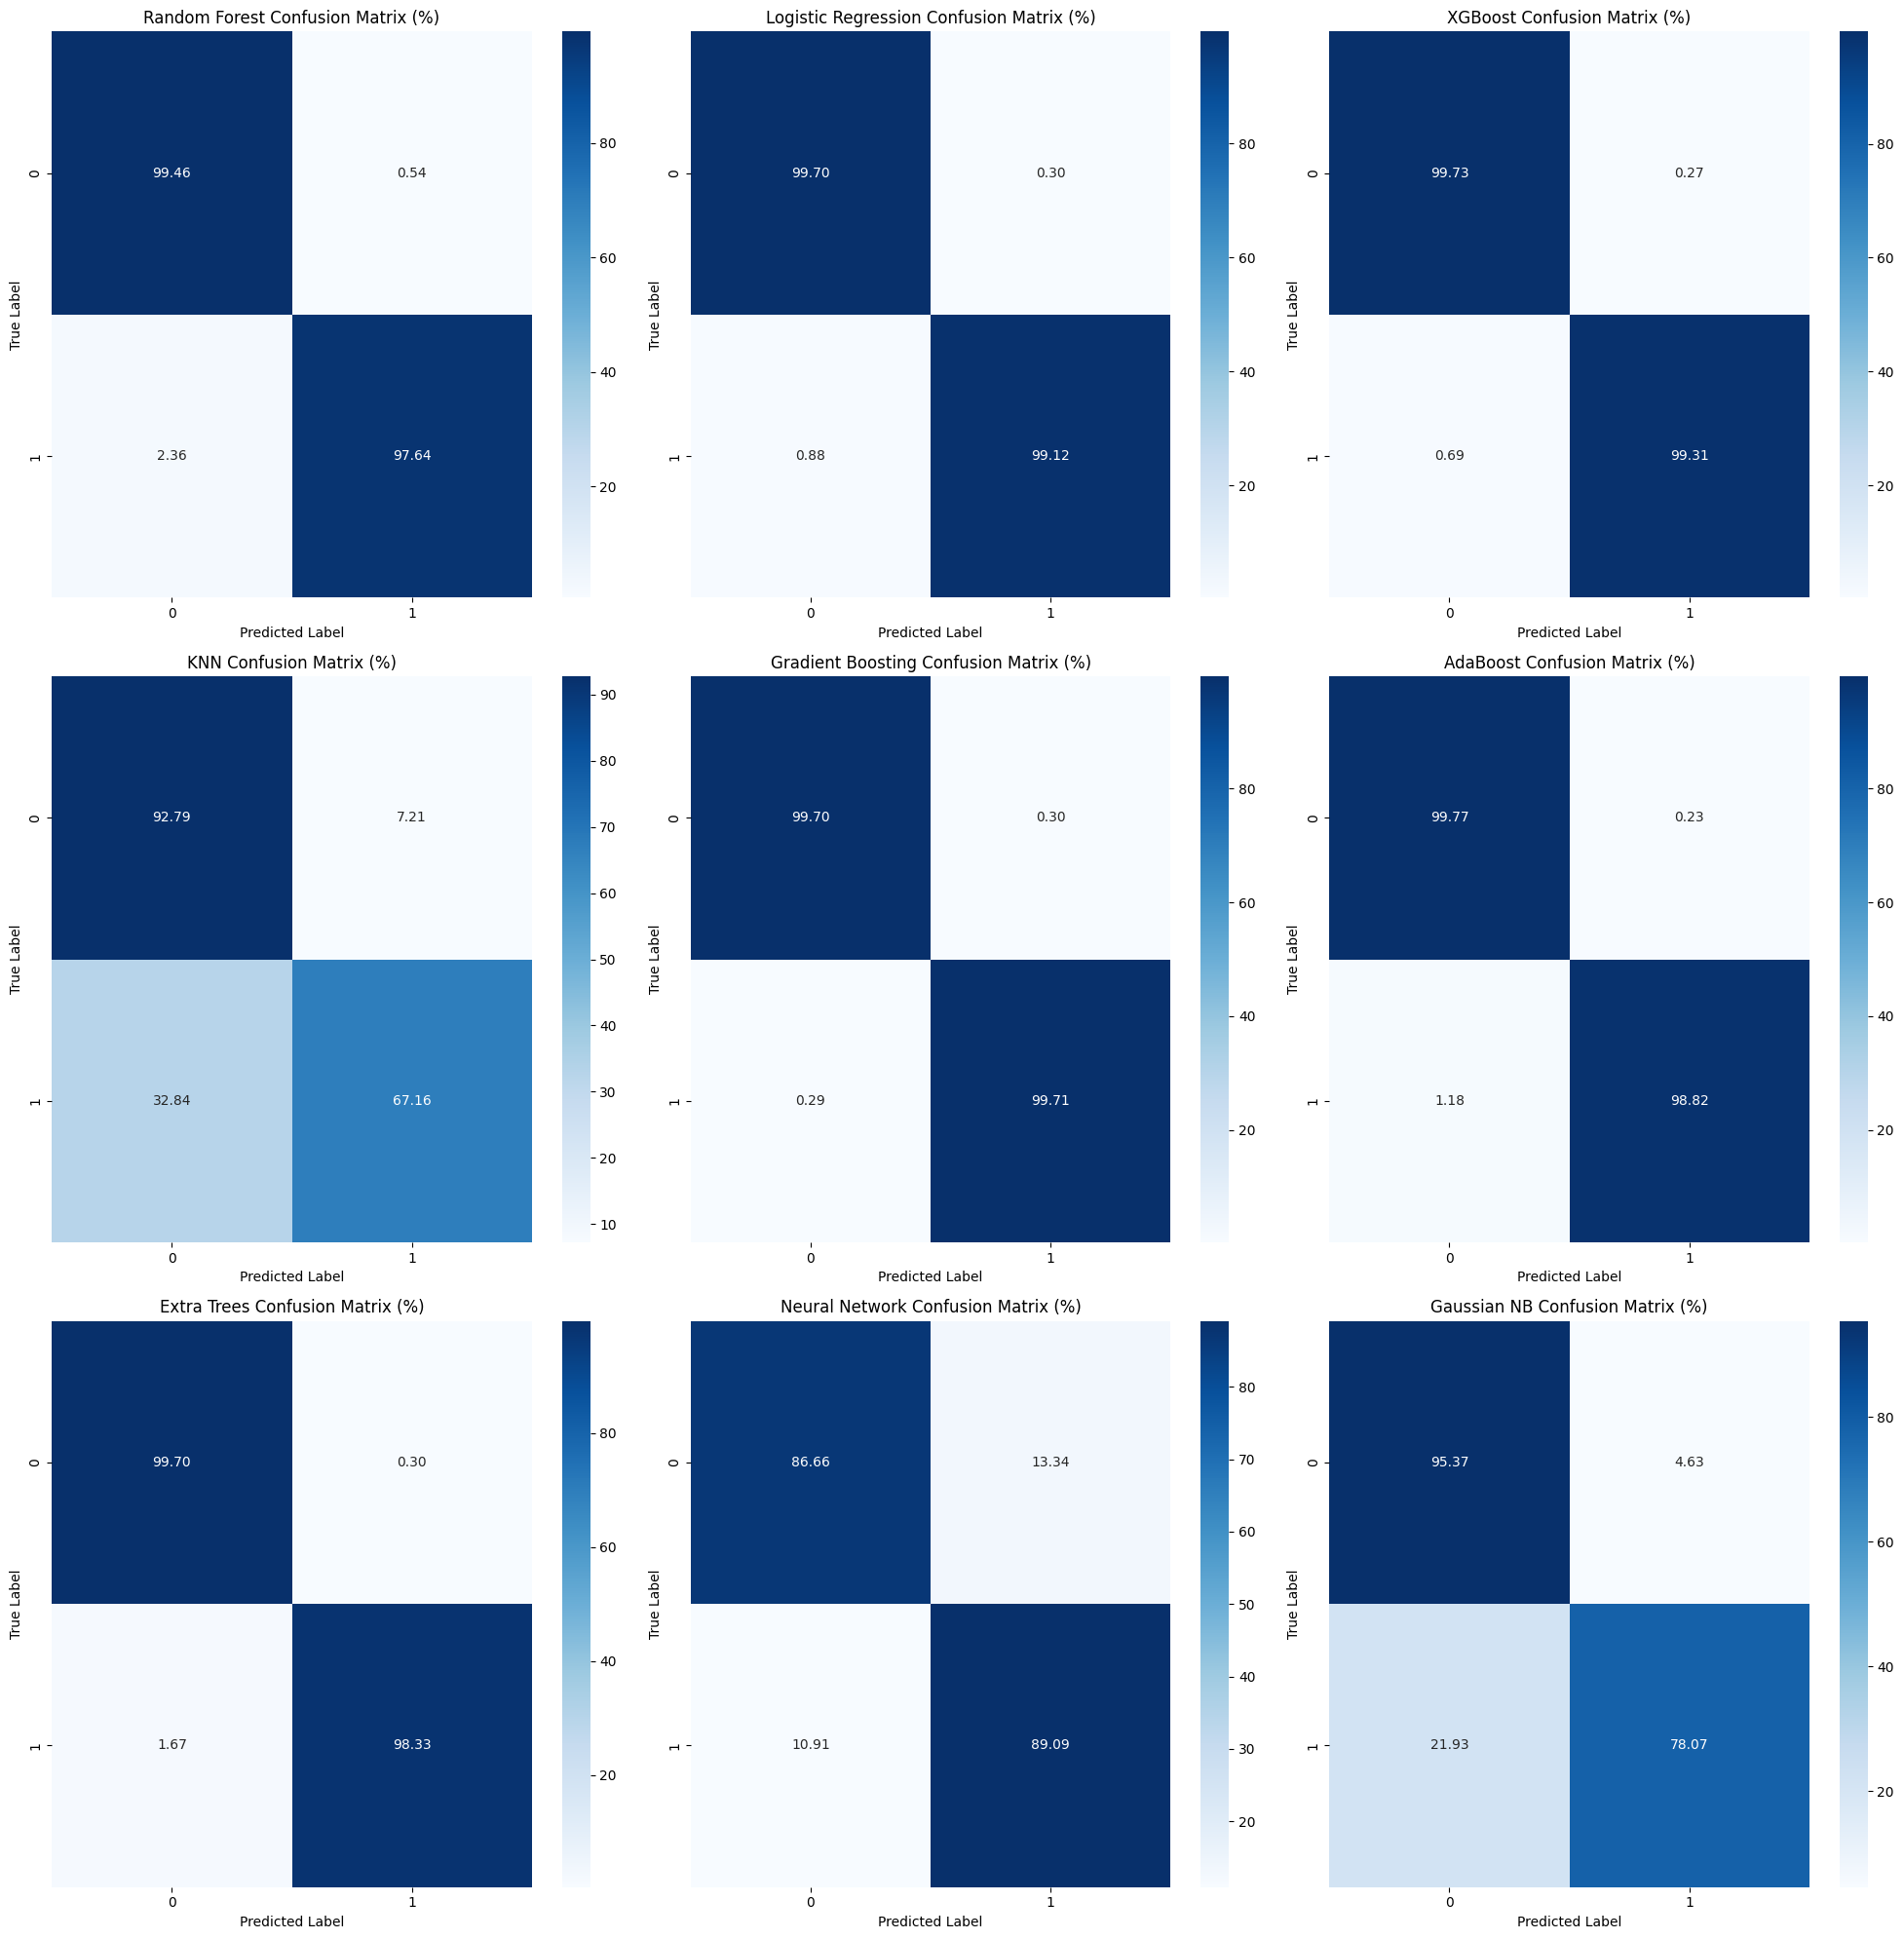

In [26]:
### 1. Import Libraries and Load Data (assuming this is already done)
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### 2. Random Forest (Previously Implemented)
rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42), rf_params, cv=5, scoring="f1"
)
rf_grid.fit(X_train, y_train)
print("\nRandom Forest Best Parameters:", rf_grid.best_params_)
print("Best F1 Score:", rf_grid.best_score_)

### 3. Logistic Regression
lr_params = {
    "C": [0.001, 0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"],
}

lr_grid = GridSearchCV(LogisticRegression(max_iter=1000), lr_params, cv=5, scoring="f1")
lr_grid.fit(X_train, y_train)
print("\nLogistic Regression Best Parameters:", lr_grid.best_params_)
print("Best F1 Score:", lr_grid.best_score_)

### 4. XGBoost
xgb_params = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200],
    "min_child_weight": [1, 3],
}

xgb_grid = GridSearchCV(XGBClassifier(random_state=42), xgb_params, cv=5, scoring="f1")
xgb_grid.fit(X_train, y_train)
print("\nXGBoost Best Parameters:", xgb_grid.best_params_)
print("Best F1 Score:", xgb_grid.best_score_)

### 5. KNN
knn_params = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"],
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring="f1")
knn_grid.fit(X_train, y_train)
print("\nKNN Best Parameters:", knn_grid.best_params_)
print("Best F1 Score:", knn_grid.best_score_)

### 6. Gradient Boosting
gb_params = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.1],
    "max_depth": [3, 5],
}
gb_grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42), gb_params, cv=5, scoring="f1"
)
gb_grid.fit(X_train, y_train)
print("\nGradient Boosting Best Parameters:", gb_grid.best_params_)
print("Best F1 Score:", gb_grid.best_score_)

### 7. AdaBoost
ada_params = {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1, 1.0]}
ada_grid = GridSearchCV(
    AdaBoostClassifier(random_state=42), ada_params, cv=5, scoring="f1"
)
ada_grid.fit(X_train, y_train)
print("\nAdaBoost Best Parameters:", ada_grid.best_params_)
print("Best F1 Score:", ada_grid.best_score_)

### 8. Extra Trees
et_params = {
    "n_estimators": [100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
}
et_grid = GridSearchCV(
    ExtraTreesClassifier(random_state=42), et_params, cv=5, scoring="f1"
)
et_grid.fit(X_train, y_train)
print("\nExtra Trees Best Parameters:", et_grid.best_params_)
print("Best F1 Score:", et_grid.best_score_)

### 9. Neural Network (MLP)
mlp_params = {
    "hidden_layer_sizes": [(50,), (100,), (50, 50)],
    "activation": ["relu", "tanh"],
    "alpha": [0.0001, 0.001],
}
mlp_grid = GridSearchCV(
    MLPClassifier(random_state=42, max_iter=1000), mlp_params, cv=5, scoring="f1"
)
mlp_grid.fit(X_train, y_train)
print("\nNeural Network Best Parameters:", mlp_grid.best_params_)
print("Best F1 Score:", mlp_grid.best_score_)

### 10. Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_score = cross_val_score(gnb_model, X_train, y_train, cv=5, scoring="f1").mean()
print("\nGaussian Naive Bayes F1 Score:", gnb_score)

### Combine all models
all_models = {
    "Random Forest": rf_grid.best_estimator_,
    "Logistic Regression": lr_grid.best_estimator_,
    "XGBoost": xgb_grid.best_estimator_,
    "KNN": knn_grid.best_estimator_,
    "Gradient Boosting": gb_grid.best_estimator_,
    "AdaBoost": ada_grid.best_estimator_,
    "Extra Trees": et_grid.best_estimator_,
    "Neural Network": mlp_grid.best_estimator_,
    "Gaussian NB": gnb_model,
}

### Model Comparison
model_scores = {}
for name, model in all_models.items():
    y_pred = model.predict(X_test)
    model_scores[name] = {
        "F1": f1_score(y_test, y_pred),
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
    }

scores_df = pd.DataFrame(model_scores).T
scores_df = scores_df.sort_values("F1", ascending=False)

print("\nFinal Model Comparison (Sorted by F1 Score):")
print(scores_df)

### Visualizations
# 1. Model Performance Comparison
plt.figure(figsize=(15, 6))
scores_df["F1"].plot(kind="bar")
plt.title("Model Comparison - F1 Scores")
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. ROC Curves
plt.figure(figsize=(10, 6))
for name, model in all_models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend(loc="lower right")
plt.show()

# 3. Confusion Matrices
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.ravel()

for idx, (name, model) in enumerate(all_models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cm_percent = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] * 100

    sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="Blues", ax=axes[idx])
    axes[idx].set_title(f"{name} Confusion Matrix (%)")
    axes[idx].set_ylabel("True Label")
    axes[idx].set_xlabel("Predicted Label")

plt.tight_layout()
plt.show()
